In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load your new dataset
df = pd.read_csv('/content/sample_data/WhatsgoodlyData-6.csv')

In [ ]:
df.shape

(1450, 7)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,index,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1450 non-null   int64  
 1   Question             1450 non-null   object 
 2   Segment Type         1450 non-null   object 
 3   Segment Description  1450 non-null   object 
 4   Answer               1450 non-null   object 
 5   Count                1450 non-null   int64  
 6   Percentage           1450 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 79.4+ KB


In [ ]:
df.describe()

,index,Count,Percentage
count,1450.000000,1450.000000,1450.000000
mean,724.500000,35.013793,0.199313
std,418.723258,95.055604,0.274989
min,0.000000,0.000000,0.000000
25%,362.250000,0.000000,0.000000
50%,724.500000,1.000000,0.063500
75%,1086.750000,20.000000,0.323750
max,1449.000000,947.000000,1.000000



**<span style="color: yellow; font-size: 40px;">COUNT PLOT</span>**


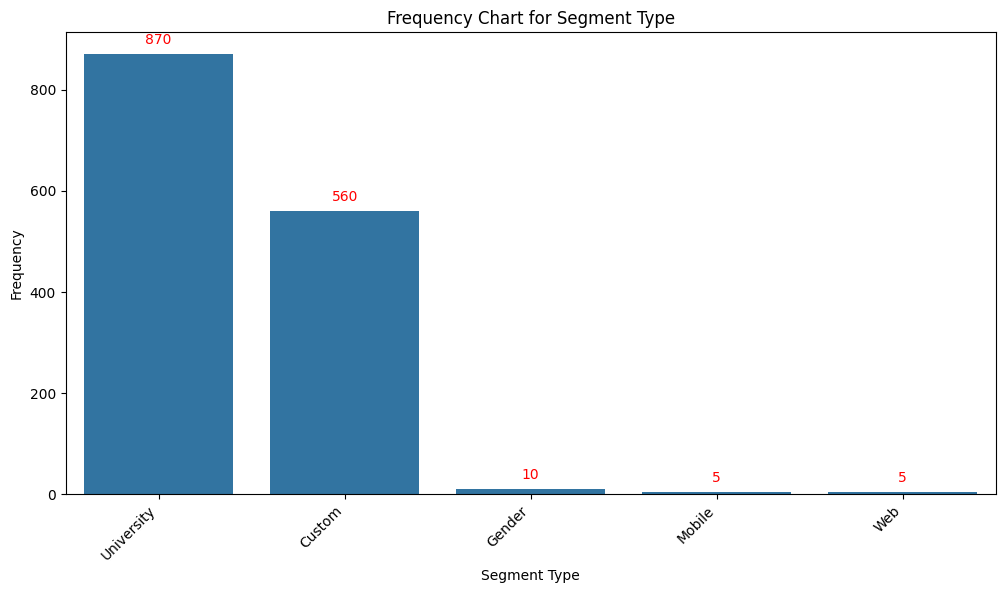

In [ ]:
plt.figure(figsize=(12, 6))
ax = sb.countplot(data=df, x='Segment Type', order=df['Segment Type'].value_counts().index)
plt.title('Frequency Chart for Segment Type')
plt.xlabel('Segment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add integer numbers on top of the bars with red text
for p in ax.patches:
    count_value = int(p.get_height())  # Convert to integer
    ax.annotate(f'{count_value}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                color='red')  # Set the text color to red
plt.show()

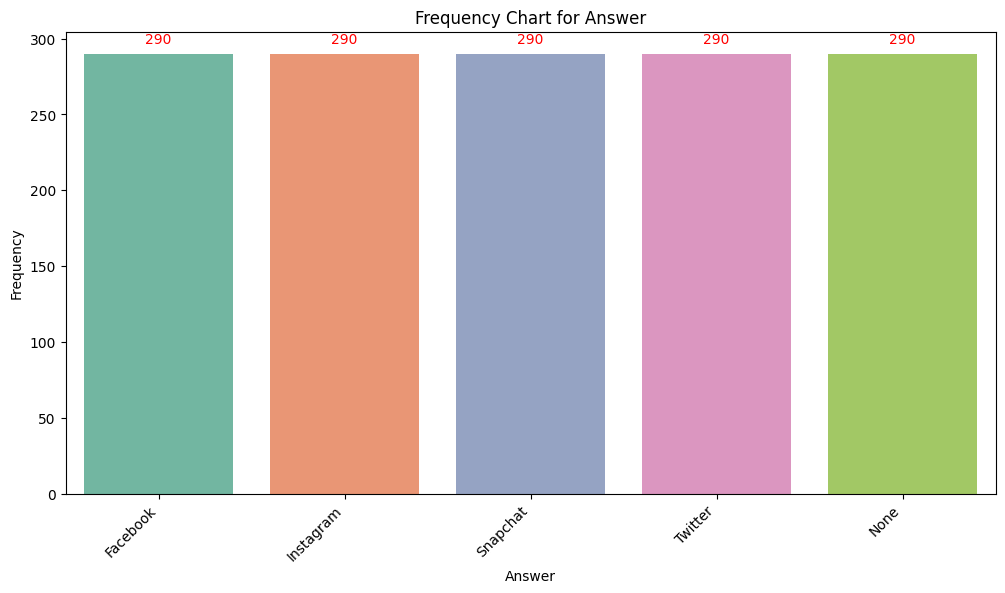

In [ ]:
# Replace 'None' with 'No' in the 'Answer' column
df['Answer'] = df['Answer'].replace('None', 'None')

# Replace NaN with 'No' in the 'Answer' column
df['Answer'] = df['Answer'].replace(np.nan, 'None')

# Visualization: Countplot for 'Answer' (including 'None')
plt.figure(figsize=(12, 6))
ax = sb.countplot(data=df, x='Answer', order=df['Answer'].value_counts().index, palette='Set2')
plt.title('Frequency Chart for Answer')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add integer numbers on top of the bars with red text
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                color='red')  # Set the text color to red
plt.show()

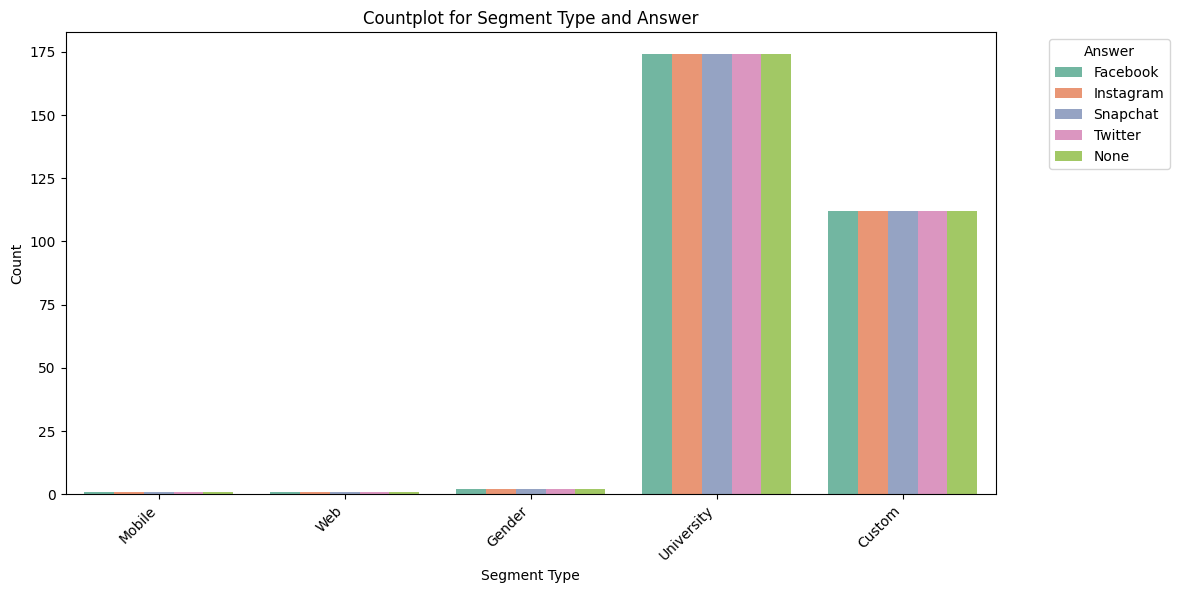

In [ ]:
# Replace NaN with 'No' in the 'Answer' column
df['Answer'] = df['Answer'].replace(np.nan, 'None')

# Visualization: Countplot for 'Segment Type' and 'Answer' (including 'None')
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x='Segment Type', hue='Answer', palette='Set2')
plt.title('Countplot for Segment Type and Answer')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Answer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**<span style="color: yellow; font-size: 40px;">STACKED BAR PLOT</span>**


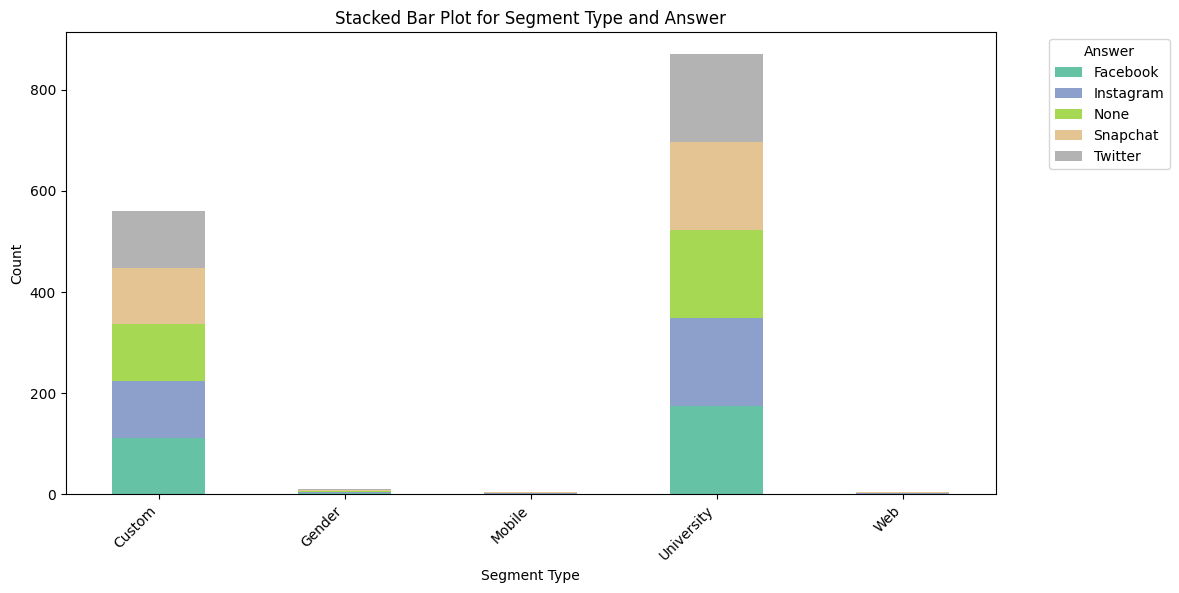

In [ ]:
# Replace NaN with 'No' in the 'Answer' column
df['Answer'] = df['Answer'].replace(np.nan, 'None')

# Visualization: Stacked bar plot for 'Segment Type' and 'Answer' (including 'None')
segment_answer_cross = pd.crosstab(df['Segment Type'], df['Answer'])
segment_answer_cross.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Bar Plot for Segment Type and Answer')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Answer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**<span style="color: yellow; font-size: 40px;">BOX PLOT</span>**


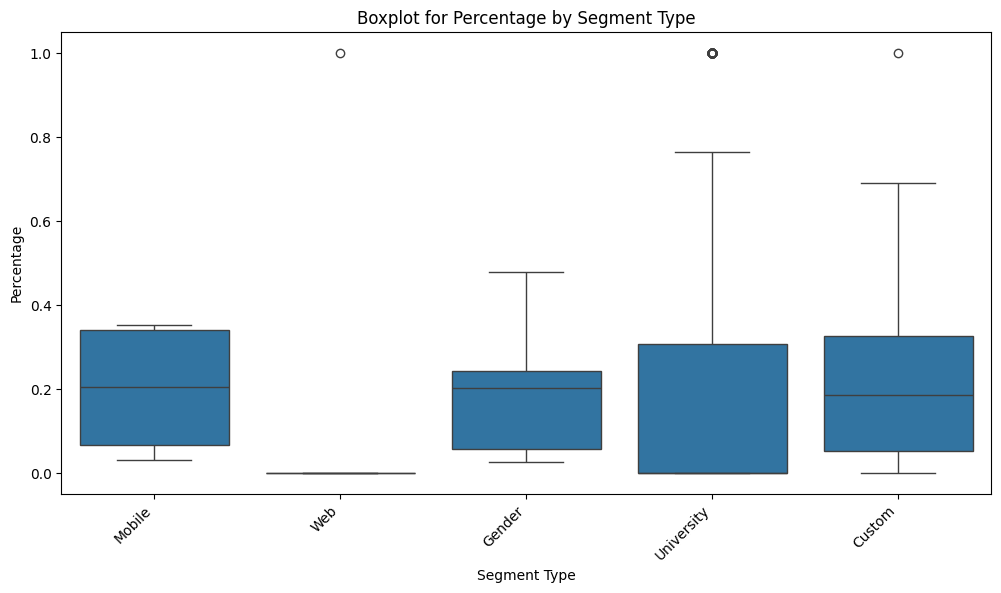

In [ ]:
# Visualization 5: Boxplot for 'Percentage' by 'Segment Type'
plt.figure(figsize=(12, 6))
sb.boxplot(data=df, x='Segment Type', y='Percentage')
plt.title('Boxplot for Percentage by Segment Type')
plt.xlabel('Segment Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

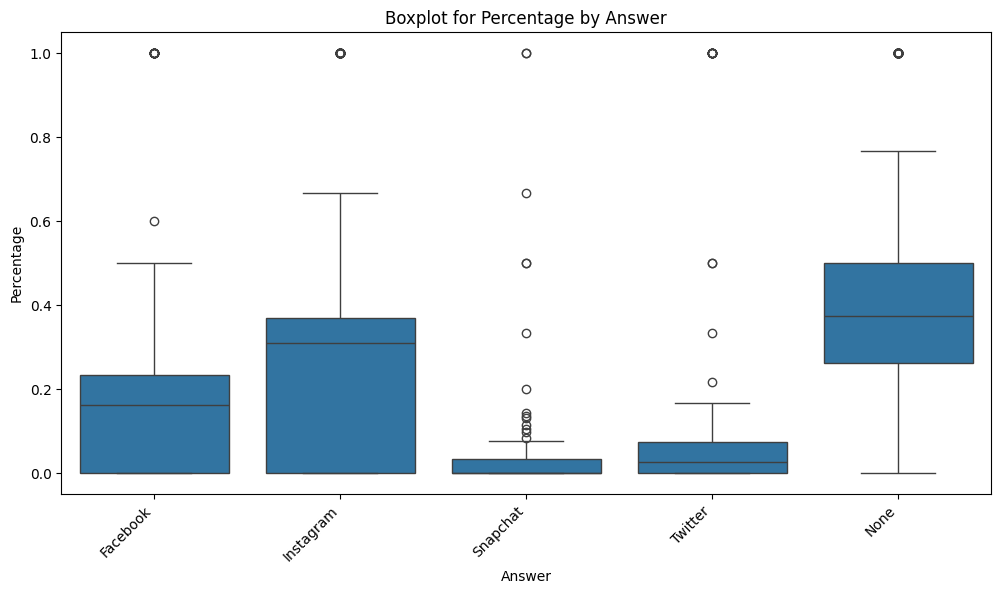

In [ ]:
# Convert 'Percentage' column to numeric
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')

# Visualization: Boxplot for 'Percentage' by 'Answer'
plt.figure(figsize=(12, 6))
sb.boxplot(data=df, x='Answer', y='Percentage')
plt.title('Boxplot for Percentage by Answer')
plt.xlabel('Answer')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()


**<span style="color: yellow; font-size: 40px;">PIE CHART</span>**


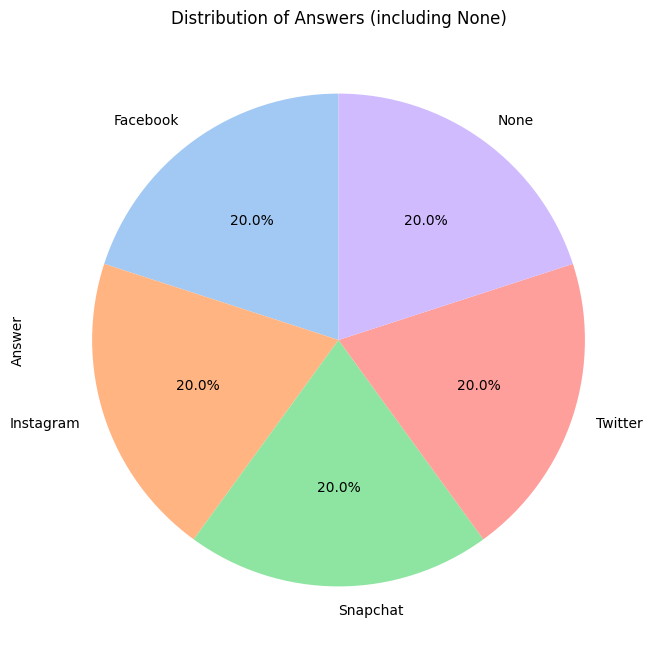

In [ ]:
# Replace NaN with 'No' in the 'Answer' column
df['Answer'] = df['Answer'].replace(np.nan, 'None')

# Visualization: Pie chart for distribution of 'Answer' (including 'None')
plt.figure(figsize=(8, 8))
df['Answer'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))
plt.title('Distribution of Answers (including None)')
plt.show()

In [ ]:
# Print unique values in the 'Answer' column
print(df['Answer'].unique())

['Facebook' 'Instagram' 'Snapchat' 'Twitter' 'None']




**<span style="color: yellow; font-size: 40px;">HISTOGRAM</span>**


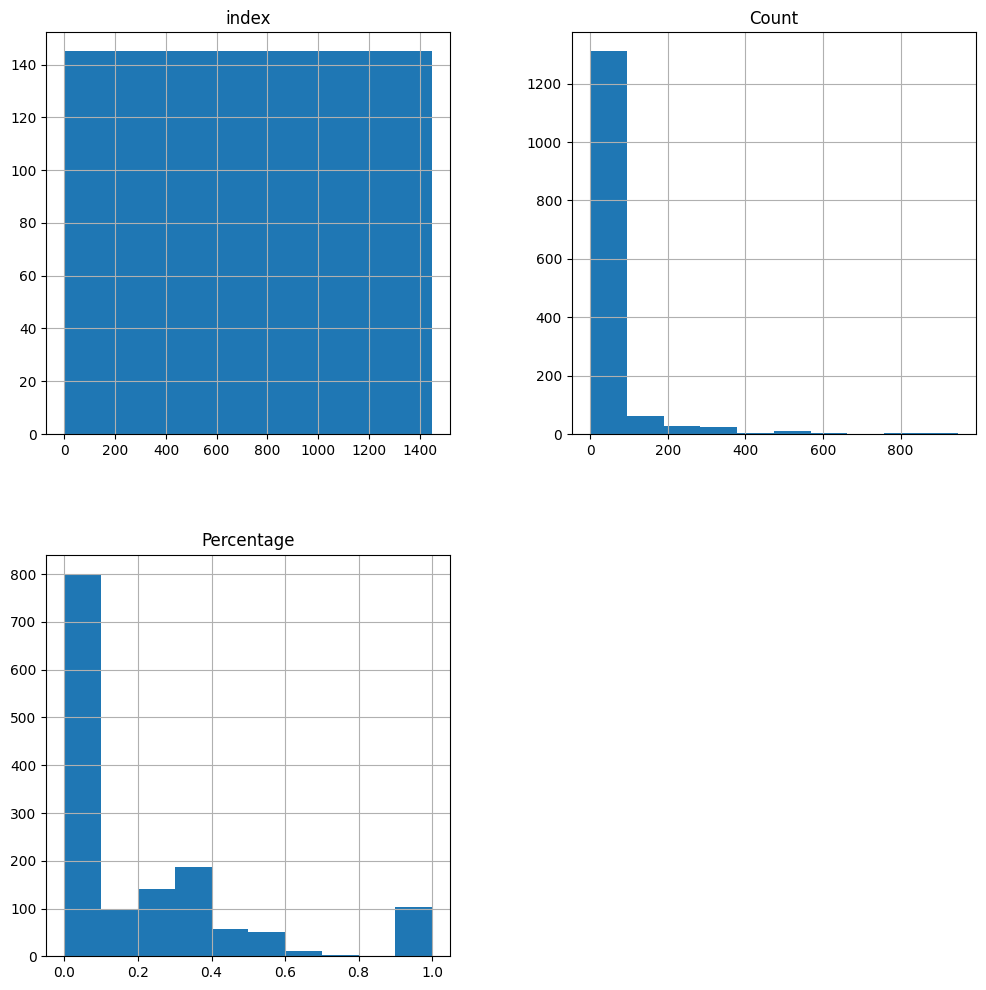

In [ ]:
df.hist(figsize=(12,12))
plt.show()


**<span style="color: yellow; font-size: 40px;">CORRELATION MATRIX</span>**


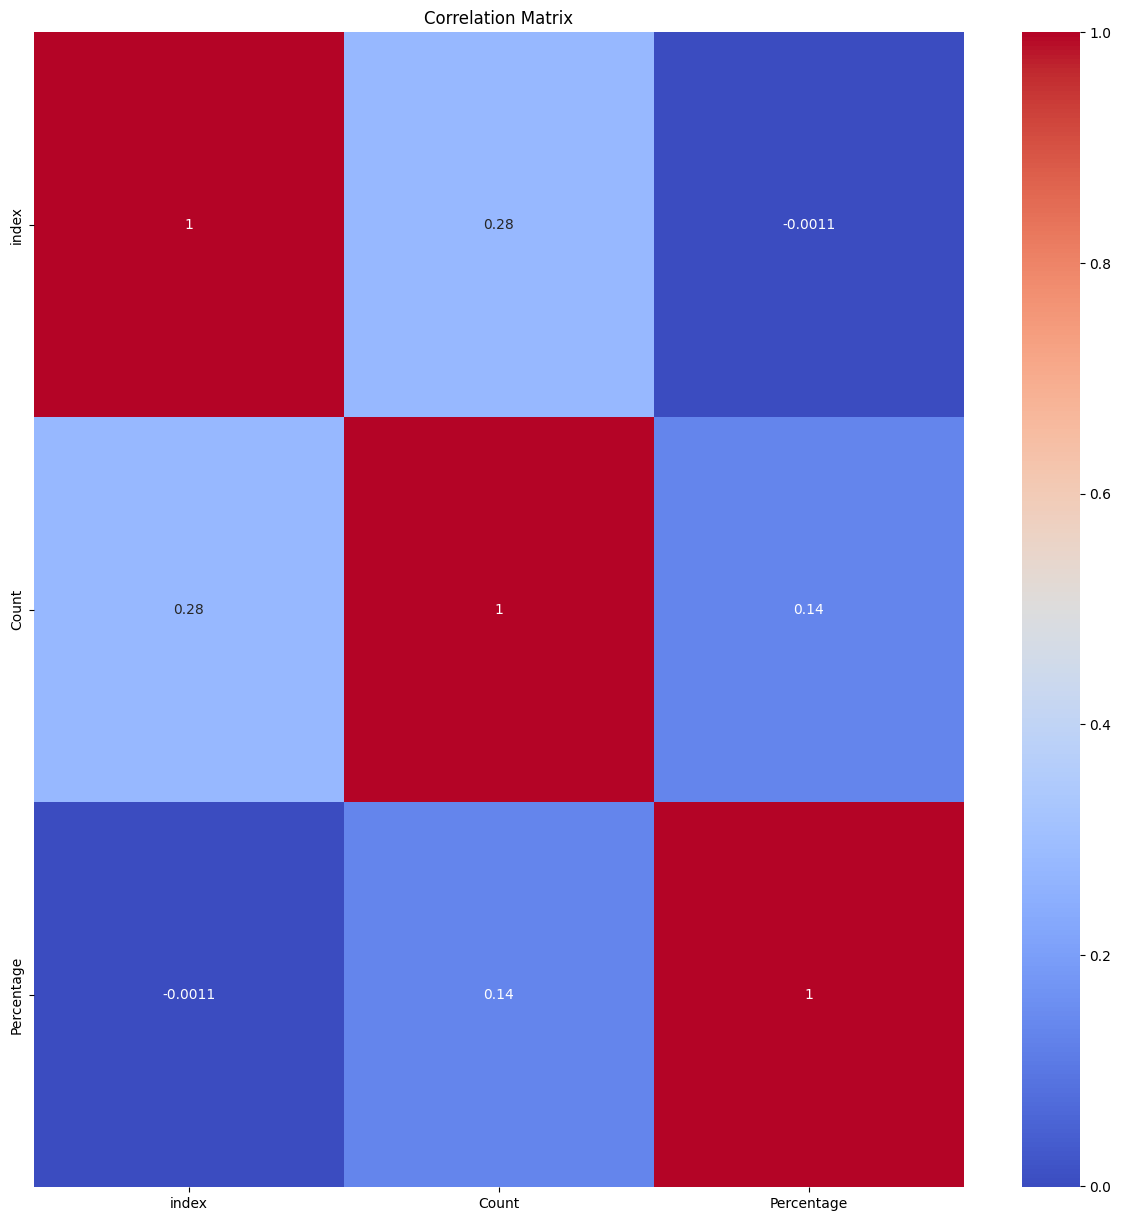

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix for numeric columns
corr = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

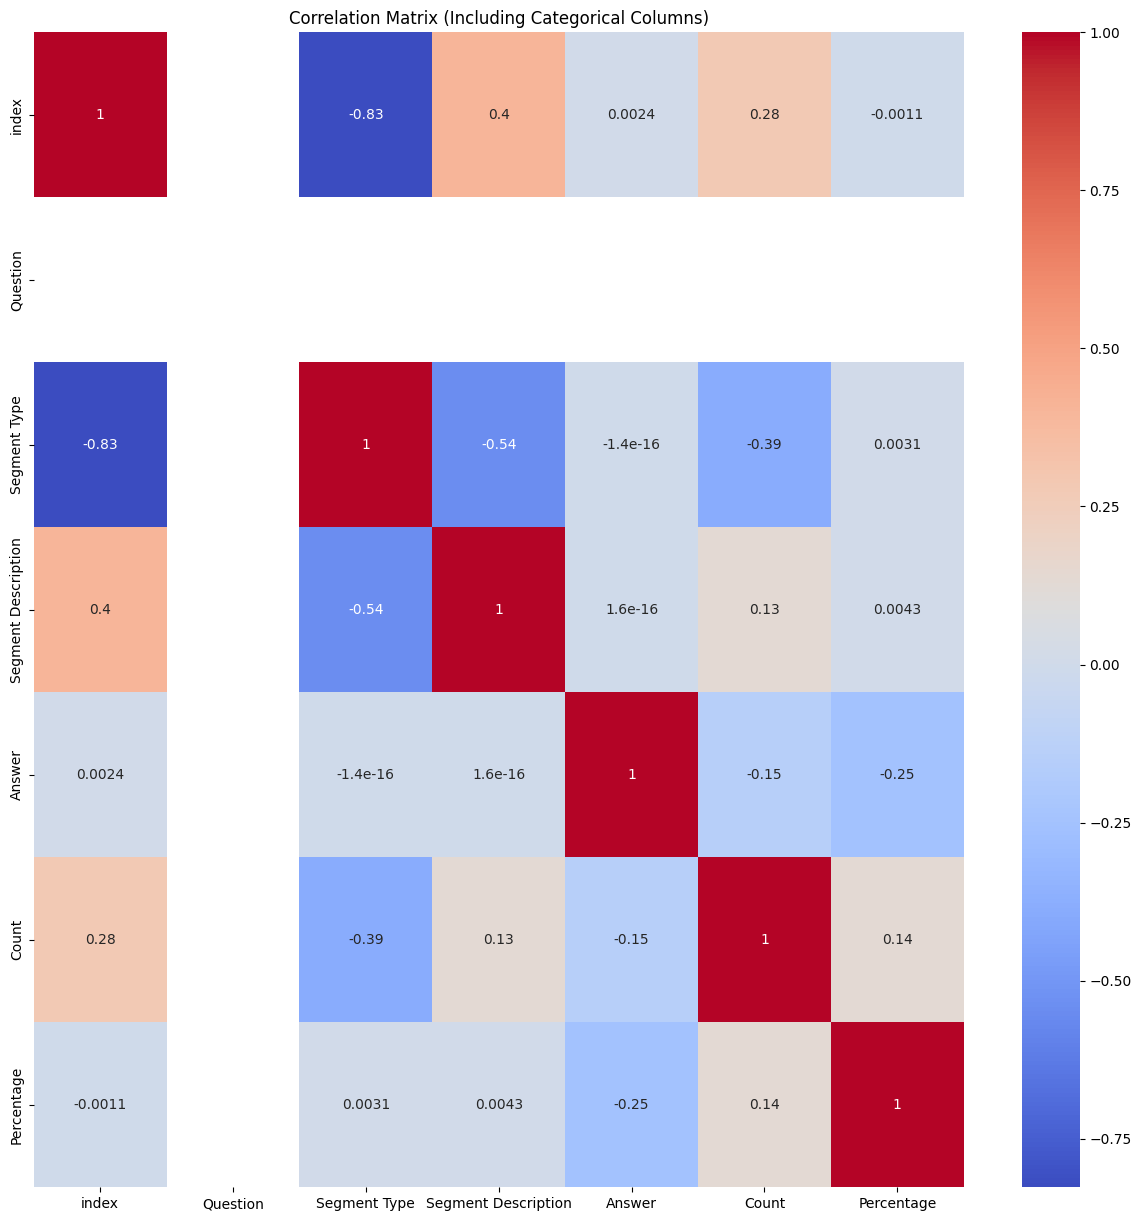

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df.copy()

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Create a correlation matrix for all columns
corr_all = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sb.heatmap(corr_all, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Including Categorical Columns)')
plt.show()

**<span style="color: yellow; font-size: 40px;">PAIR PLOT</span>**


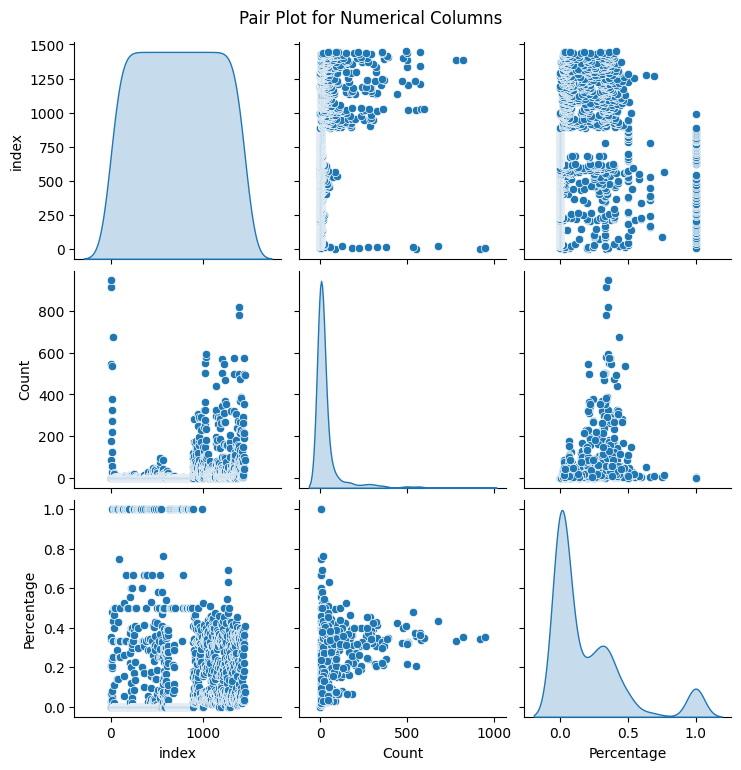

In [ ]:
# Visualization: Pair plot for numerical columns
sb.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()

**<span style="color: yellow; font-size: 40px;">LINE PLOT</span>**


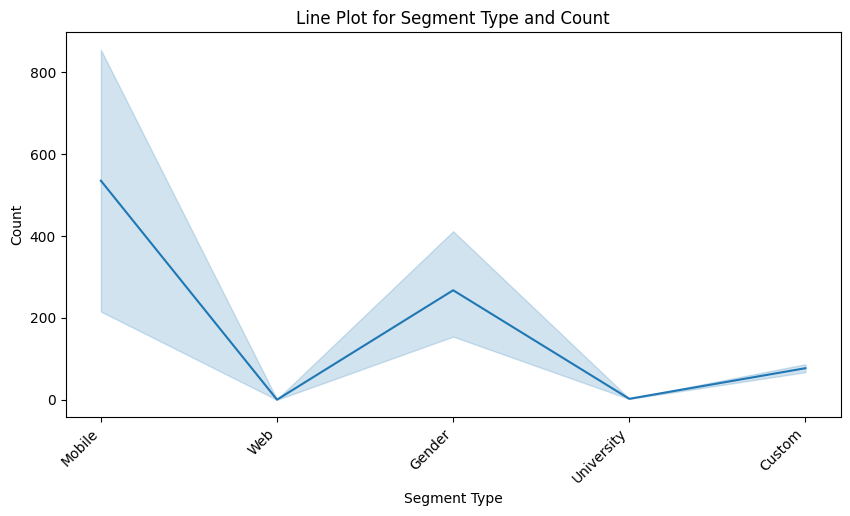

In [ ]:
plt.figure(figsize=(10, 5))
sb.lineplot(data=df, x='Segment Type', y='Count')
plt.title('Line Plot for Segment Type and Count')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

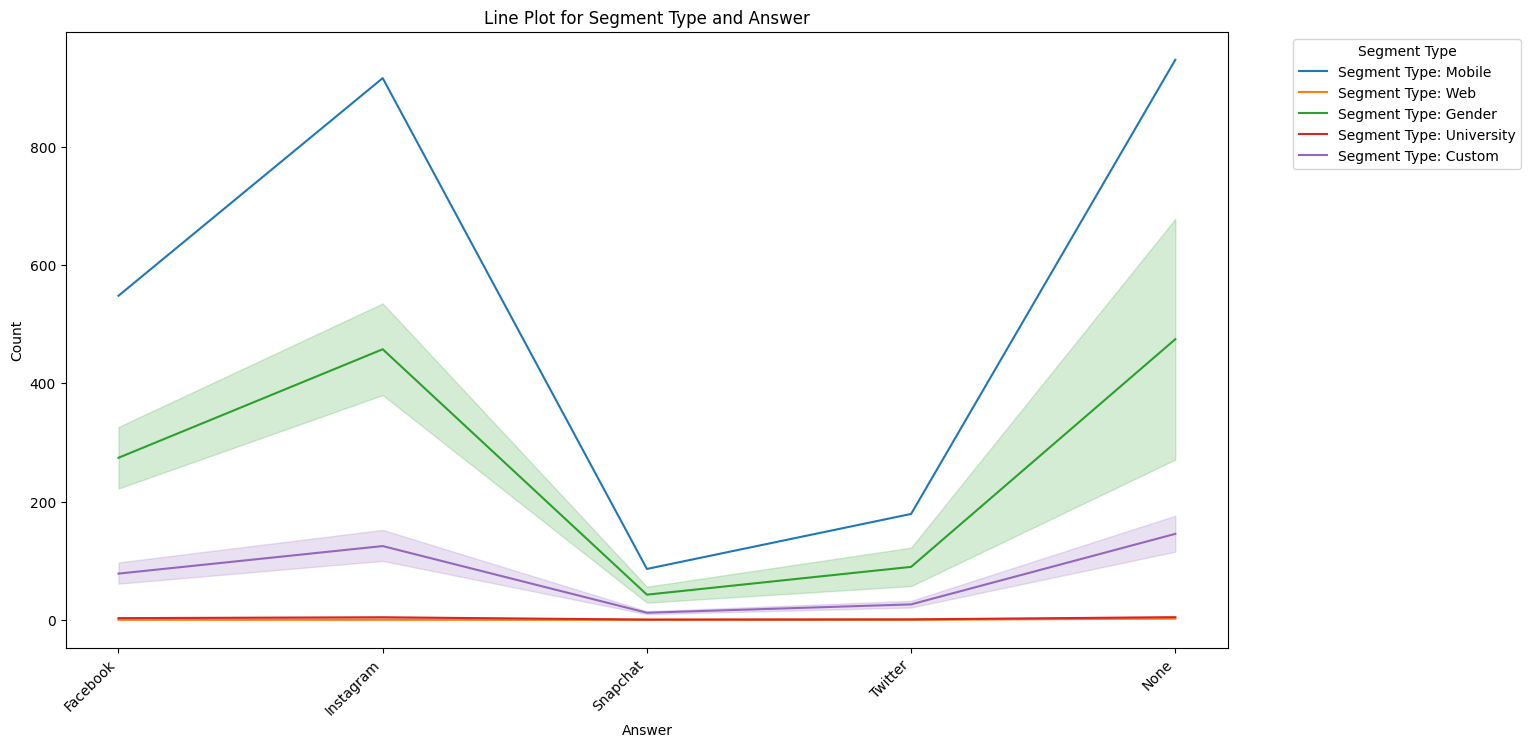

In [ ]:
# Replace NaN with 'No' in the 'Answer' column
df['Answer'] = df['Answer'].replace(np.nan, 'No')

# Visualization: Line plot for 'Segment Type' and 'Answer'
plt.figure(figsize=(15, 8))

# Iterate through unique 'Segment Type' values
for segment_type in df['Segment Type'].unique():
    subset = df[df['Segment Type'] == segment_type]
    sb.lineplot(data=subset, x='Answer', y='Count', label=f'Segment Type: {segment_type}')

plt.title('Line Plot for Segment Type and Answer')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**<span style="color: yellow; font-size: 40px;">SCATTER PLOT</span>**


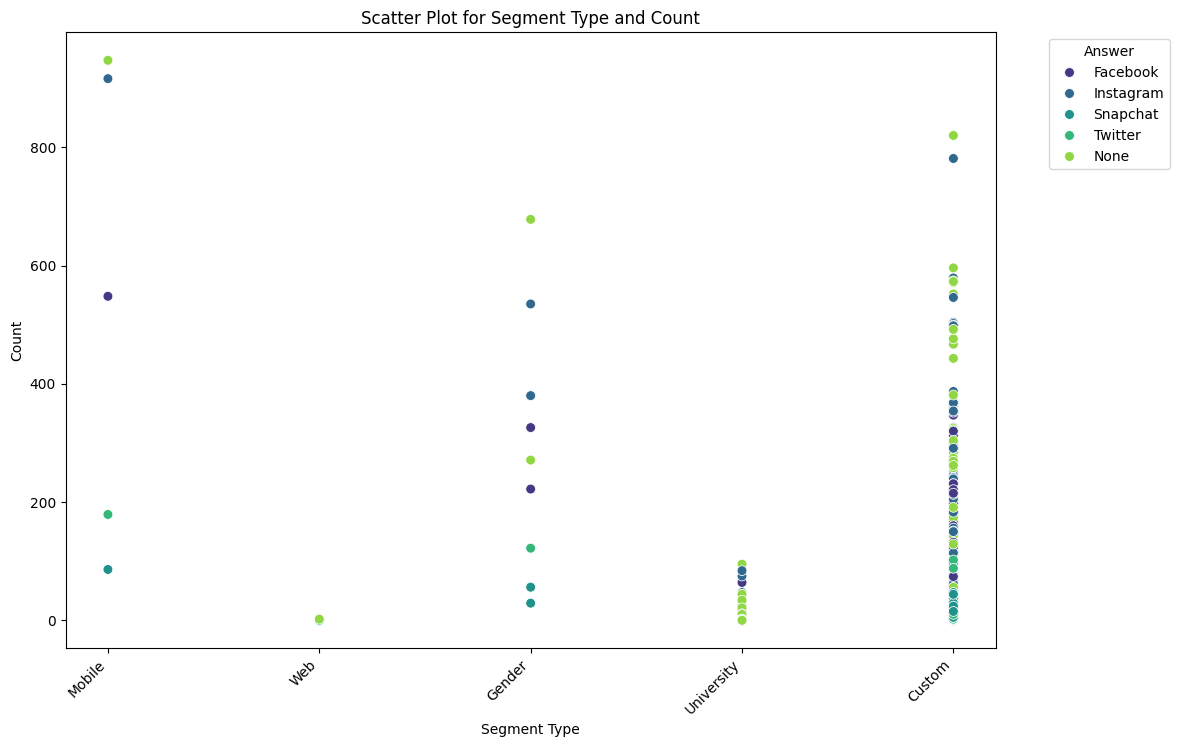

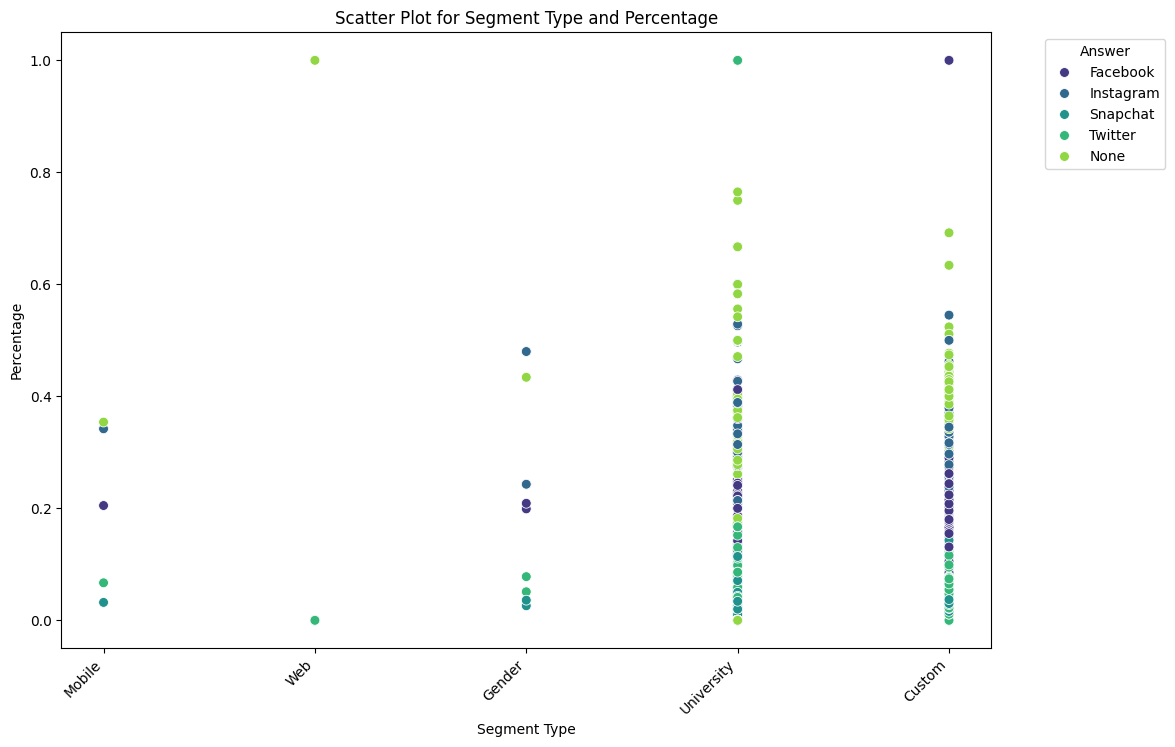

In [ ]:
# Replace NaN with 'No' in the 'Answer' column
df['Answer'] = df['Answer'].replace(np.nan, 'No')

# Select numerical columns (excluding the first column, assuming it's 'Index')
numerical_columns = df.select_dtypes(include='number').iloc[:, 1:].columns

# Visualization: Scatter plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(12, 8))
    sb.scatterplot(data=df, x='Segment Type', y=column, hue='Answer', palette='viridis', s=50)
    plt.title(f'Scatter Plot for Segment Type and {column}')
    plt.xlabel('Segment Type')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Answer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()